In [110]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('supermarket.csv', sep=',')

In [88]:
df = data.copy()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [92]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
if any(df.isnull().sum()) or any(df.isna().sum()):
    print(True)
else:
    print(False)

In [105]:
df.groupby('City').sum()

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_27992/1820233090.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City').sum()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2


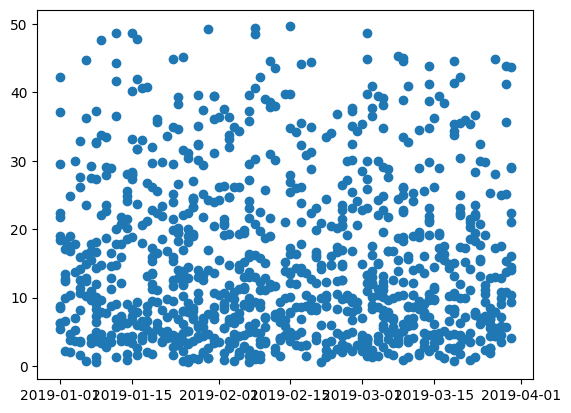

In [119]:
plt.scatter(x=df['Date'], y=df['gross income'])

In [120]:
df['week'] = df['Date'].dt.weekofyear

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_27992/4139912652.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.weekofyear


In [143]:
gross_income = df.groupby(['City', 'week'])['gross income'].sum()
# gross_income.loc(gross_income['gross income'] == gross_income['gross income'].max())

In [145]:
gross_income.idxmax()

('Mandalay', 9)

In [173]:
df.groupby(['Product line'])['Quantity'].sum().idxmax()

'Electronic accessories'

In [147]:
df['Product line'].value_counts().idxmax()

'Fashion accessories'

In [148]:
df['Customer type'].value_counts(normalize=True)

Member    0.501
Normal    0.499
Name: Customer type, dtype: float64

In [150]:
round(df.groupby(['Payment'])['Total'].mean(), 2)

Payment
Cash           326.18
Credit card    324.01
Ewallet        318.82
Name: Total, dtype: float64

In [167]:
week_3 = df[df['week'] == 3]
pay_check_week = week_3.groupby(['Payment'])['Total'].mean()
# pay_check_week.loc(pay_check_week['week'] == '3')

In [168]:
pay_check_week

Payment
Cash           439.59125
Credit card    345.60900
Ewallet        282.20395
Name: Total, dtype: float64